In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_seq_items', 1000)
%matplotlib inline


In [2]:
df2 = pd.read_stata('../../data/external/fetzer_study_data.dta')

In [3]:
df2.shape

(382, 110)

In [4]:
df2.head(5)

,id,Region_Code,Region,code,Area,Electorate,Pct_Turnout,Votes_Cast,Valid_Votes,Remain,Leave,Pct_Remain,Pct_Leave,Pct_Rejected,EU75Leaveshare,pensionergrowth20012011,ResidentAge30to44share,ResidentAge45to59share,ResidentAge60plusshare,median_hourly_pay2005,median_hourly_pay_growth,mean_hourly_pay2005,mean_hourly_pay_growth,iqrpay2005,EU_2001Migrantshare,NONEU_2001Migrantshare,EU_Migrantgrowth,NONEU_Migrantgrowth,unqualifiedsharechange,self_employment_rate_aps,umemployment_rate_aps,economic_activity_rate_aps2015,MEP_Turnout,MEP_ConPct,MEP_LabPct,MEP_LDPct,MEP_UKIPPct,MEP_GreenPct,MEP_BNPPct,Total_EconomyEU_dependence,TotalImpactFLWAAYR,TREATED_WITHIN_62_DAYS,PRCP_AMT22,PRCP_AMT23,life_sat_mean,life_sat_cv,BREXITINDEXNARROW,noqual_2001_sh,quall1_2001_sh,quall2_2001_sh,quall3_2001_sh,quall4plus_2001_sh,noqual_sh_growth,quall1_sh_growth,quall2_sh_growth,quall3_sh_growth,quall4plus_sh_growth,ind2001_Agriculture_sh,ind2001_Mining_sh,ind2001_Manufacturing_sh,ind2001_Construction_sh,ind2001_Retail_sh,ind2001_HotelRestaurant_sh,ind2001_Transport_sh,ind2001_Finance_sh,AgricultureShareGrowth,MiningShareGrowth,ManufacturingShareGrowth,ConstructionShareGrowth,RetailShareGrowth,HotelRestaurantShareGrowth,TransportShareGrowth,FinanceShareGrowth,ResidentUnder30share,eufundspercapitapayment13,PrivateRentedshare2001,Ownedshare2001,CouncilRented2001,CouncilRentedGrowth,PrivateRentedGrowth,OwnedshareGrowth,PublicEmployment2014,PublicEmployment2009,PublicEmploymentGrowth,iqrpayGrowth,MigrantEUAccessionGrowth,MigrantOldEUMemberGrowth,MigrantElsewhereGrowth,InitialEUAccession,InitialOldEUMember,InitialElsewhere,CommutingToLondon,rr_1,rr_2,rr_3,rr_4,rr_5,rr_6,rr_7,rr_8,rr_9,rr_10,rr_11,rr_12,cc_1,cc_2,cc_3,cc_4,anyrain23,anyrain22
0,70.0,E12000001,North East,E06000001,Hartlepool,70341.0,65.59,46134.0,46100.0,14029.0,32071.0,30.43,69.57,0.07,0.326522,0.125610,0.222354,0.186862,0.214906,9.27,0.341963,10.89,0.319559,8.12,0.004085,0.011940,0.005722,0.005496,-0.004097,7.1,10.1,71.4,27.1,15.71,31.09,2.68,39.03,4.11,1.97,0.088,712.0,80.11,0.0,0.0,7.47,0.71,0.620690,0.476107,0.162989,0.186763,0.060077,0.114064,-0.074102,-0.027501,-0.025207,0.064889,0.061921,0.006575,0.006309,0.204638,0.090486,0.158225,0.048605,0.059209,0.019134,-0.002895,0.000761,-0.087870,0.009177,-0.008438,0.002710,-0.000427,0.001757,0.375879,84.278999,0.074147,0.626508,0.197646,-0.098324,0.062495,-0.028150,0.241379,0.266667,-0.025287,0.301724,0.004706,0.000429,0.006083,0.000587,0.004085,0.011353,0.000337,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,71.0,E12000001,North East,E06000002,Middlesbrough,94612.0,64.89,61393.0,61358.0,21181.0,40177.0,34.52,65.48,0.06,0.326522,0.067761,0.216425,0.175159,0.195996,8.58,0.377622,10.02,0.320359,6.28,0.006726,0.032650,0.010700,0.030981,0.015263,5.6,12.1,72.2,24.2,15.64,35.46,3.13,36.58,4.07,1.70,0.088,717.0,80.11,0.0,0.0,7.41,0.73,0.555556,0.436824,0.165037,0.192328,0.077535,0.128277,-0.043278,-0.028698,-0.039342,0.054176,0.057142,0.004583,0.005150,0.144088,0.084798,0.172294,0.057972,0.070503,0.026563,-0.003079,0.001944,-0.062874,-0.000101,-0.005025,0.009951,0.007741,-0.001667,0.412421,68.096825,0.070880,0.608259,0.209774,-0.104028,0.080301,-0.036209,0.327869,0.349206,-0.021338,0.334395,0.009551,0.000349,0.031782,0.000801,0.006726,0.031849,0.000311,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,72.0,E12000001,North East,E06000003,Redcar and Cleveland,103529.0,70.26,72741.0,72714.0,24586.0,48128.0,33.81,66.19,0.04,0.326522,0.143282,0.213330,0.201931,0.224830,10.77,0.159703,11.45,0.235808,8.82,0.005362,0.012858,0.002638,-0.001488,-0.022780,7.8,8.3,73.9,29.6,18.46,27.84,7.51,36.11,4.43,1.56,0.088,618.0,78.24,0.0,0.0,7.57,0.70,NaN,0.445130,0.173792,0.193903,0.062492,0.124684,-0.064501,-0.039147,-0.029730,0.068774,0.064604,0.010296,0.016060,0.188139,0.083654,0.160273,0.048568,0.061295,0.021070,-0.005238,0.003920,-0.084952,0.004645,-0.003585,0.005146,0.002836,-0.001497,0.359910,68.096825,0.055222,0.69124

In [5]:
df2.code.nunique()

382

In [6]:
fetzer_df = df2[['code', 'Area', 'Pct_Remain', 'Pct_Leave', 'Region', 'ResidentAge30to44share', 
                     'ResidentAge45to59share',
                    'ResidentAge60plusshare', 'median_hourly_pay2005', 'median_hourly_pay_growth', 
                    'umemployment_rate_aps', 'EU_2001Migrantshare', 'NONEU_2001Migrantshare']].dropna()

fetzer_df.shape

(377, 13)

In [7]:
fetzer_df['Leave?'] = (fetzer_df['Pct_Leave'] >= fetzer_df['Pct_Remain']).astype(int)

In [8]:
def result(row):
    if row['Pct_Leave'] > row['Pct_Remain']:
        return 'leave'
    elif row['Pct_Leave'] < row['Pct_Remain']:
        return 'remain'
    else:
        return 'draw'

In [9]:
fetzer_df['Result'] = fetzer_df.apply(lambda row: result(row), axis=1)

In [10]:
fetzer_df.tail()

,code,Area,Pct_Remain,Pct_Leave,Region,ResidentAge30to44share,ResidentAge45to59share,ResidentAge60plusshare,median_hourly_pay2005,median_hourly_pay_growth,umemployment_rate_aps,EU_2001Migrantshare,NONEU_2001Migrantshare,Leave?,Result
375,W06000020,Torfaen,40.22,59.78,Wales,0.213911,0.198177,0.217935,10.55,0.157346,6.7,0.005421,0.010335,1,leave
376,W06000021,Monmouthshire,50.44,49.56,Wales,0.212652,0.219532,0.235837,12.21,0.326781,3.3,0.009212,0.018767,0,remain
377,W06000022,Newport,44.01,55.99,Wales,0.219997,0.186168,0.210574,9.67,0.255429,6.9,0.008977,0.029085,1,leave
378,W06000023,Powys,46.26,53.74,Wales,0.199693,0.216811,0.257087,9.26,0.240821,3.8,0.007534,0.015385,1,leave
379,W06000024,Merthyr Tydfil,43.56,56.44,Wales,0.217413,0.191833,0.214126,8.80,0.268182,8.2,0.003287,0.008753,1,leave


In [11]:
fetzer_df.Result.value_counts()

leave     262
remain    115
Name: Result, dtype: int64

In [12]:
fetzer_df.shape

(377, 15)

In [13]:
fetzer_df.to_csv('fetzer_processed_data.csv')

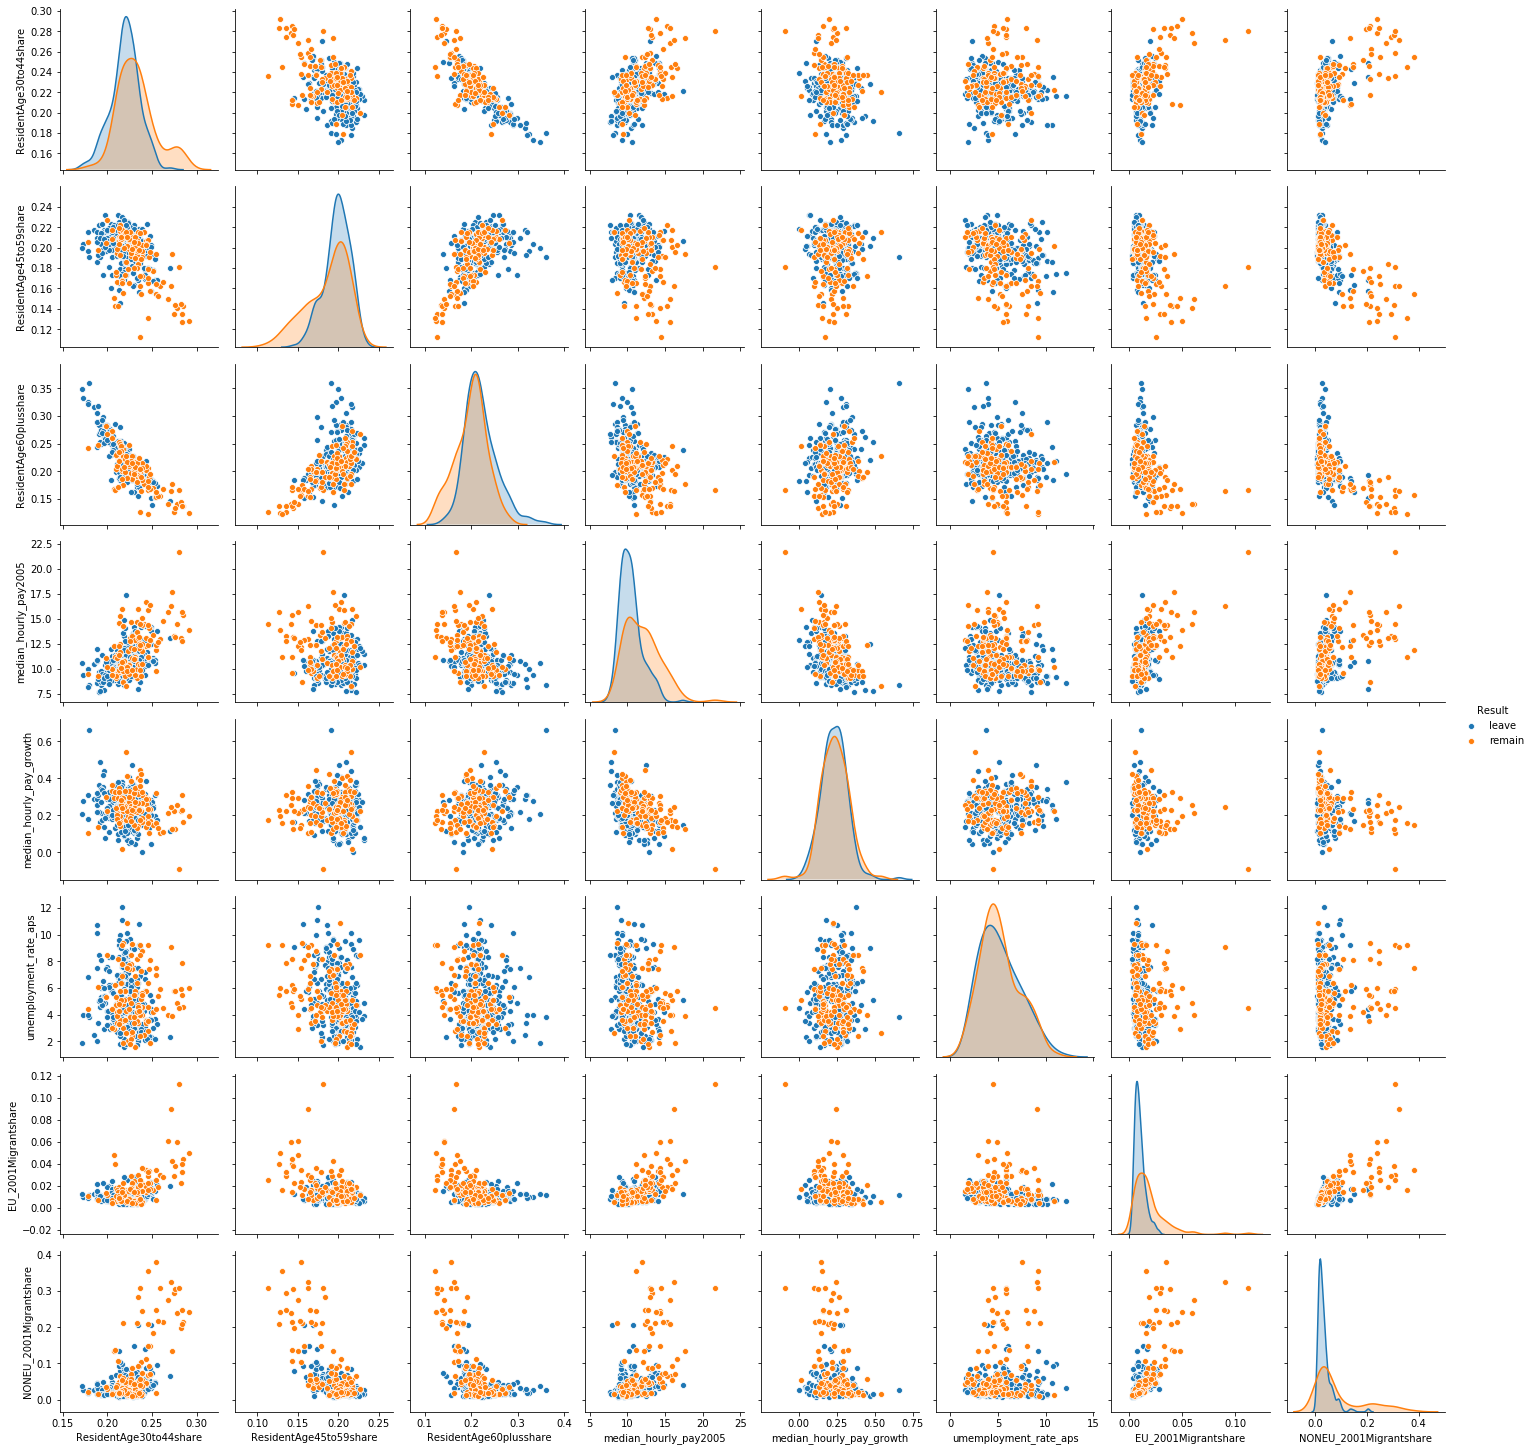

In [14]:
sns.pairplot(fetzer_df, hue = 'Result', vars=['ResidentAge30to44share', 
                     'ResidentAge45to59share',
                    'ResidentAge60plusshare', 'median_hourly_pay2005', 'median_hourly_pay_growth', 
                    'umemployment_rate_aps', 'EU_2001Migrantshare', 'NONEU_2001Migrantshare'])